In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


# Classification with Tensorflow and Keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [19]:
print(X_train_full.shape)
print(X_train_full.dtype)
print(X_test.shape)
print(X_test.dtype)

(60000, 28, 28)
uint8
(10000, 28, 28)
uint8


In [20]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankled boot"]

In [21]:
print(X_valid.shape)
print(X_valid.dtype)
print(X_train.shape)
print(X_train.dtype)

(5000, 28, 28)
float64
(55000, 28, 28)
float64


In [23]:
model = keras.models.Sequential([
    # keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers

In [26]:
hidden1 = model.layers[1]

print(hidden1.name)
w, b = hidden1.get_weights()
print(w.shape)
print(b.shape)

dense_12
(784, 300)
(300,)


In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 22s 12ms/step - loss: 0.7256 - accuracy: 0.7578 - val_loss: 0.5318 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4900 - accuracy: 0.8293 - val_loss: 0.4507 - val_accuracy: 0.8422
Epoch 3/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4413 - accuracy: 0.8435 - val_loss: 0.4243 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 25s 14ms/step - loss: 0.4125 - accuracy: 0.8549 - val_loss: 0.3925 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3909 - accuracy: 0.8621 - val_loss: 0.3763 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3736 - accuracy: 0.8682 - val_loss: 0.3673 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3607 - accuracy: 0.8729 - val_loss: 0.3563 -

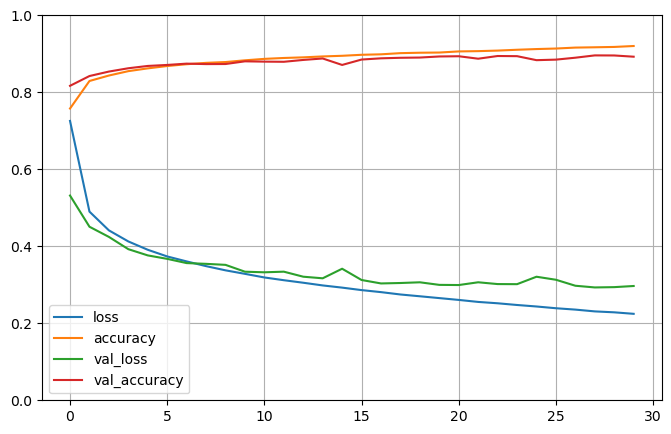

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.show()

In [1]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

# Load and Pre-process Images

In [5]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds

In [6]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

print(archive)
print(data_dir)

228813984/228813984 [==============================] - 49s 0us/step
/home/hanhf/.keras/datasets/flower_photos.tgz
/home/hanhf/.keras/datasets/flower_photos


In [7]:
data_path = pathlib.Path('data/train/').with_suffix('')
print(data_path)

data/train


In [8]:
images_count = len(list(data_path.glob('*/*.jpg')))
print(images_count)

2000


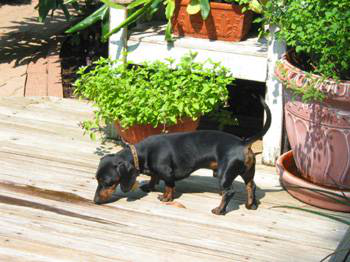

In [10]:
dogs = list(data_path.glob('dog/*'))
Image.open(str(dogs[1]))

## Create a dataset

In [11]:
batch_size = 10
img_height = 200
img_width = 200

In [13]:
train_dataset = keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='training',
    seed=84,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [14]:
val_dataset = keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='validation',
    seed=84,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [15]:
class_names = train_dataset.class_names
print(class_names)

['cat', 'dog']


## Visualize the data

2023-06-30 09:32:16.427401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1600]
	 [[{{node Placeholder/_0}}]]
2023-06-30 09:32:16.440216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]


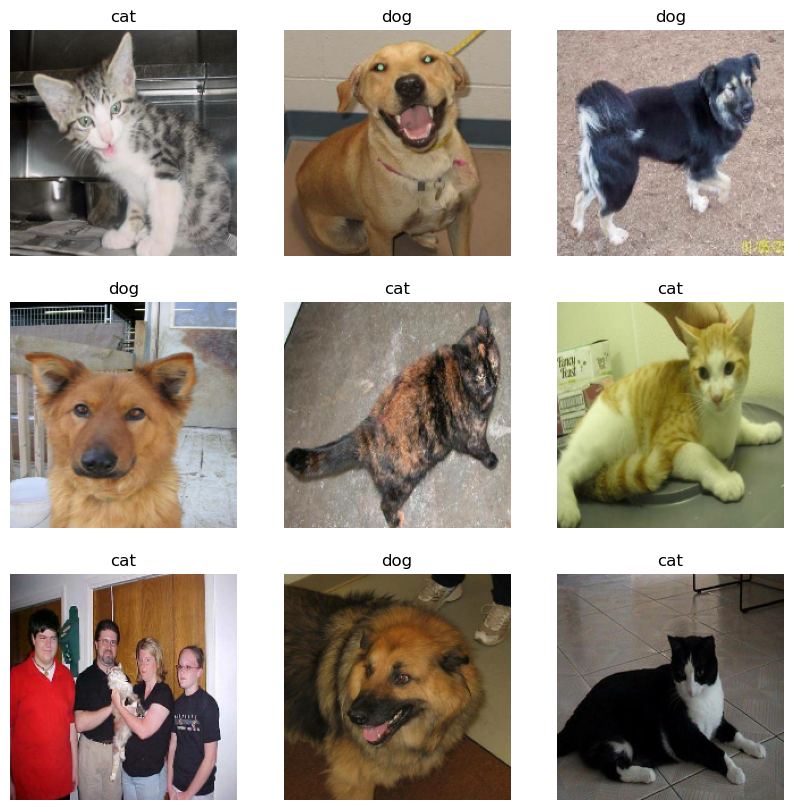

In [17]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
for img_batch, labels_batch in train_dataset:
    print(img_batch.shape)
    print(labels_batch.shape)
    break

2023-06-30 09:33:44.255796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]
2023-06-30 09:33:44.257561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]


(10, 200, 200, 3)
(10,)


## Standardize the data

In [20]:
normalization_layer = keras.layers.Rescaling(1./255)
# To scale pixel values to [-1,1], use: tf.keras.layers.Rescaling(1./127.5, offset=-1)

## Configure the dataset for performance

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.  
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Train the Model

In [26]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=[200, 200, 3]),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(
        filters=6,
        kernel_size=5,
        activation='relu'
    ), # 196 196, 6
    keras.layers.MaxPooling2D(), # 98, 98, 6
    keras.layers.Conv2D( 
        filters=18,
        kernel_size=3,
        activation='relu'
    ), # 96, 96, 18
    keras.layers.MaxPooling2D(), # 48, 48, 18
    keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu'
    ), # 46, 46, 10
    keras.layers.MaxPooling2D(), # 23, 23, 10
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 196, 196, 6)       456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 18)        990       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 18)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 10)       

In [28]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [30]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10


160/160 [==============================] - 60s 371ms/step - loss: 0.3551 - accuracy: 0.8456 - val_loss: 1.1533 - val_accuracy: 0.5750
Epoch 2/10
160/160 [==============================] - 67s 415ms/step - loss: 0.2642 - accuracy: 0.8881 - val_loss: 1.5752 - val_accuracy: 0.5925
Epoch 3/10
160/160 [==============================] - 71s 443ms/step - loss: 0.1261 - accuracy: 0.9494 - val_loss: 1.7288 - val_accuracy: 0.6150
Epoch 4/10
160/160 [==============================] - 64s 400ms/step - loss: 0.0617 - accuracy: 0.9819 - val_loss: 1.9504 - val_accuracy: 0.6250
Epoch 5/10
160/160 [==============================] - 63s 393ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 2.3829 - val_accuracy: 0.6325
Epoch 6/10
160/160 [==============================] - 63s 392ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 1.9851 - val_accuracy: 0.6325
Epoch 7/10
160/160 [==============================] - 65s 408ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 2.8509 - val_accuracy: 0.6

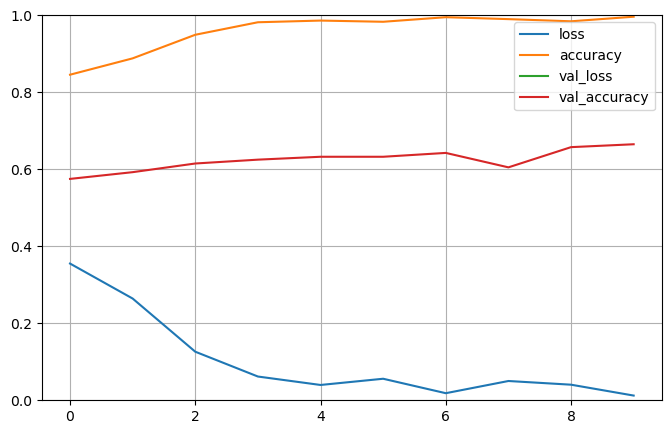

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.show()